# Scipy - High-Level Scientific Computing
__Authors:__ _Adrien Chauve, Andre Espaze, Emmanuelle Gouillart, Gaël Varoquaux, Ralf Gommers_
## Scipy
The scipy package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

`Scipy` can be compared to other standard scientific-computing libraries, such as the GSL (_GNU Scientific Library_ for `C` and `C++`), or `Matlab`’s toolboxes. `Scipy` is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that `numpy` and `scipy` work hand in hand.

Before implementing a routine, it is worth checking if the desired data processing is not already implemented in `Scipy`. As non-professional programmers, scientists often tend to re-invent the wheel, which leads to buggy, non-optimal, difficult-to-share and unmaintainable code. By contrast, `Scipy`‘s routines are optimized and tested, and should therefore be used when possible.

`scipy` is composed of task-specific sub-modules:

Sub-module | Description
--- | ---
[`scipy.cluster`](http://docs.scipy.org/doc/scipy/reference/cluster.html#module-scipy.cluster) | Vector quantization / Kmeans
[`scipy.constants`](http://docs.scipy.org/doc/scipy/reference/constants.html#module-scipy.constants) | Physical and mathematical constants
[`scipy.fftpack`](http://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack) | Fourier transform
[`scipy.integrate`](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) | Integration routines
[`scipy.interpolate`](http://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate) | Interpolation
[`scipy.io`](http://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io) | Data input and output
[`scipy.linalg`](http://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg) | Linear algebra routines
[`scipy.ndimage`](http://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage) | n-dimensional image package
[`scipy.odr`](http://docs.scipy.org/doc/scipy/reference/odr.html#module-scipy.odr) | Orthogonal distance regression
[`scipy.optimize`](http://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) | Optimization
[`scipy.signal`](http://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) | Signal processing
[`scipy.sparse`](http://docs.scipy.org/doc/scipy/reference/sparse.html#module-scipy.sparse) | Sparse matrices
[`scipy.spatial`](http://docs.scipy.org/doc/scipy/reference/spatial.html#module-scipy.spatial) | Spatial data structures and algorithms
[`scipy.special`](http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special) | Any special mathematical functions
[`scipy.stats`](http://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) | Statistics

They all depend on numpy, but are mostly independent of each other. The standard way of importing `Numpy` and these `Scipy` modules is:

In [1]:
import numpy as np
from scipy import stats  # same for other sub-modules

The main scipy namespace mostly contains functions that are really `numpy` functions (try `scipy.cos` is `np.cos`). Those are exposed for historical reasons only; there’s usually no reason to use `import scipy` in your code.

## 1. File input/output: [`scipy.io`](http://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io)
* Loading and saving `Matlab` files:

In [2]:
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = spio.loadmat('file.mat', struct_as_record=True)
data['a']

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

* Reading images:

In [3]:
from scipy import misc
misc.imread('images/fname.png')    

# Matplotlib also has a similar function
import matplotlib.pyplot as plt
plt.imread('images/fname.png')

array([[[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
      

See also:
* Load text files: [`numpy.loadtxt()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy.loadtxt)/[`numpy.savetxt()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html#numpy.savetxt)
* Clever loading of text/csv files: [`numpy.genfromtxt()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt)/`numpy.recfromcsv()`
* Fast and efficient, but numpy-specific, binary format: [`numpy.save()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html#numpy.save)/[`numpy.load()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html#numpy.load)

## 2. Special functions: [`scipy.special`](http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special)
Special functions are transcendental functions. The docstring of the [`scipy.special`](http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special) module is well-written, so we won’t list all functions here. Frequently used ones are:
* Bessel function, such as `scipy.special.jn()` (nth integer order Bessel function)
* Elliptic function (`scipy.special.ellipj()` for the Jacobian elliptic function, ...)
* Gamma function: `scipy.special.gamma()`, also note `scipy.special.gammaln()` which will give the log of Gamma to a higher numerical precision.
* Erf, the area under a Gaussian curve: `scipy.special.erf()`

## 3. Linear algebra operations: [`scipy.linalg`](http://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg)
The [`scipy.linalg`](http://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg) module provides standard linear algebra operations, relying on an underlying efficient implementation (`BLAS`, `LAPACK`).

* The [`scipy.linalg.det()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.det.html#scipy.linalg.det) function computes the determinant of a square matrix:

In [7]:
from scipy import linalg
arr = np.array([[1, 2],
                [3, 4]])
linalg.det(arr)

arr = np.array([[3, 2],
                [6, 4]])
linalg.det(arr)

linalg.det(np.ones((3, 3)))

0.0


* The [`scipy.linalg.inv()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html#scipy.linalg.inv) function computes the inverse of a square matrix:


In [8]:
arr = np.array([[1, 2],
                [3, 4]])
iarr = linalg.inv(arr)
iarr


np.allclose(np.dot(arr, iarr), np.eye(2))

True


&nbsp;&nbsp;&nbsp;&nbsp;Finally computing the inverse of a singular matrix (its determinant is zero) will raise `LinAlgError`:


In [9]:
arr = np.array([[3, 2],
                [6, 4]])
linalg.inv(arr)

LinAlgError: singular matrix


* More advanced operations are available, for example singular-value decomposition (SVD):


In [10]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

&nbsp;&nbsp;&nbsp;&nbsp;The resulting array spectrum is:

In [11]:
spec

array([ 14.88982544,   0.45294236,   0.29654967])

&nbsp;&nbsp;&nbsp;&nbsp;The original matrix can be re-composed by matrix multiplication of the outputs of `svd` with `np.dot`:

In [12]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

SVD is commonly used in statistics and signal processing. Many other standard decompositions (QR, LU, Cholesky, Schur), as well as solvers for linear systems, are available in [`scipy.linalg`](http://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg).

## 4. Fast Fourier transforms: [`scipy.fftpack`](http://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack)
The [`scipy.fftpack`](http://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack) module allows to compute _fast Fourier transforms_. As an illustration, a (noisy) input signal may look like:

In [13]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)

The observer doesn’t know the signal frequency, only the sampling time step of the signal `sig`. The signal is supposed to come from a real function so the Fourier transform will be symmetric. The [`scipy.fftpack.fftfreq()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftfreq.html#scipy.fftpack.fftfreq) function will generate the sampling frequencies and [`scipy.fftpack.fft()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html#scipy.fftpack.fft) will compute the fast Fourier transform:

In [14]:
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

Because the resulting power is symmetric, only the positive part of the spectrum needs to be used for finding the frequency:

In [15]:
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]

In [16]:
%matplotlib inline

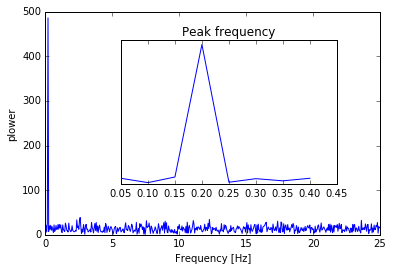

In [17]:
import pylab as plt

plt.figure()
plt.plot(freqs, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
axes = plt.axes([0.3, 0.3, 0.5, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])
plt.show()

The signal frequency can be found by:

In [18]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period)  # check that correct freq is found

True

Now the high-frequency noise will be removed from the Fourier transformed signal:

In [19]:
sig_fft[np.abs(sample_freq) > freq] = 0

The resulting filtered signal can be computed by the [`scipy.fftpack.ifft()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.ifft.html#scipy.fftpack.ifft) function:

In [20]:
main_sig = fftpack.ifft(sig_fft)

The result can be viewed with:

/home/mitchellchilderhose/anaconda3/lib/python3.4/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


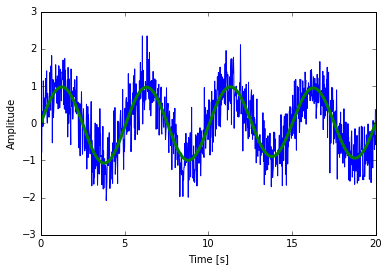

In [21]:
plt.figure()    
plt.plot(time_vec, sig)    
plt.plot(time_vec, main_sig, linewidth=3)    
plt.xlabel('Time [s]')    
plt.ylabel('Amplitude')
plt.show()

Numpy also has an implementation of FFT ([`numpy.fft`](http://docs.scipy.org/doc/numpy/reference/routines.fft.html#module-numpy.fft)). However, in general the `scipy` one should be preferred, as it uses more efficient underlying implementations.

### 4.1 Worked Example: Crude periodicity finding

/home/mitchellchilderhose/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:11: RuntimeWarning: divide by zero encountered in true_divide


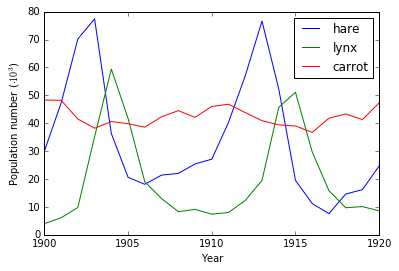

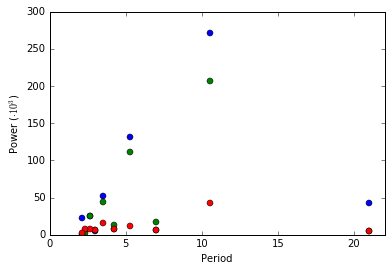

In [22]:
"""
Discover the periods in data/populations.txt
"""

data = np.loadtxt('data/populations.txt')
years = data[:, 0]
populations = data[:, 1:]

ft_populations = np.fft.fft(populations, axis=0)
frequencies = np.fft.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequencies

plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')

plt.show()

# There's probably a period of around 10 years (obvious from the
# plot), but for this crude a method, there's not enough data to say
# much more.

### 4.2 Worked example: Gaussian image blur
Convolution:
<img src="images/conv1.png" />
<img src="images/conv2.png" />

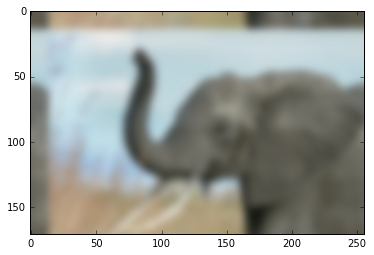

In [23]:
"""
Simple image blur by convolution with a Gaussian kernel
"""

# read image
img = plt.imread('data/elephant.png')

# prepare an 1-D Gaussian convolution kernel
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]

# padded fourier transform, with the same shape as the image
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))

# convolve
img_ft = fftpack.fft2(img, axes=(0, 1))
img2_ft = kernel_ft[:, :, np.newaxis] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

# clip values to range
img2 = np.clip(img2, 0, 1)

# plot output
plt.imshow(img2)
plt.show()

# Further exercise (only if you are familiar with this stuff):
#
# A "wrapped border" appears in the upper left and top edges of the
# image. This is because the padding is not done correctly, and does
# not take the kernel size into account (so the convolution "flows out
# of bounds of the image").  Try to remove this artifact.


### 4.3 Exercise: Denoise moon landing image
<img src="data/moonlanding.png" />
1. Examine the provided image moonlanding.png, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
2. Load the image using `pylab.imread()`.
3. Find and use the 2-D FFT function in [`scipy.fftpack`](http://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack), and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
4. The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
5. Apply the inverse Fourier transform to see the resulting image.